<a href="https://colab.research.google.com/github/developerdhruv/DL_MATH-SCRATCH_IMPLEMENTATION/blob/Py-Torch---FNN/SIMPLE_FEED_FORWARD_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [11]:
df = pd.read_csv("/content/drive/MyDrive/mnist_train.csv")
y = df['label']
x = df.drop('label', axis = 1)

In [13]:
x.sample(10).iloc[:,200:]

,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
23501,0,0,0,0,0,0,0,0,0,203,...,0,0,0,0,0,0,0,0,0,0
51397,0,0,0,0,0,0,0,0,253,252,...,0,0,0,0,0,0,0,0,0,0
9029,0,0,0,0,0,0,80,254,210,0,...,0,0,0,0,0,0,0,0,0,0
21641,0,0,0,0,0,0,0,0,23,150,...,0,0,0,0,0,0,0,0,0,0
55712,0,0,0,0,0,0,0,208,253,106,...,0,0,0,0,0,0,0,0,0,0
15035,0,0,0,0,0,0,49,238,253,132,...,0,0,0,0,0,0,0,0,0,0
20378,0,0,0,0,0,0,30,212,253,252,...,0,0,0,0,0,0,0,0,0,0
25322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2296,0,0,0,0,0,0,0,0,116,254,...,0,0,0,0,0,0,0,0,0,0
5587,0,0,0,0,0,0,0,0,0,116,...,0,0,0,0,0,0,0,0,0,0


TypeError: 'builtin_function_or_method' object is not subscriptable

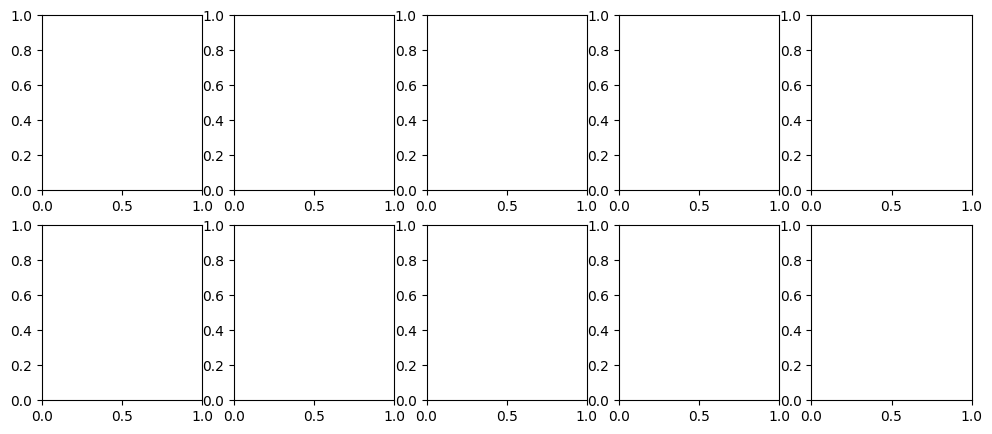

In [15]:
fig, axes = plt.subplots(2,5, figsize = (12,5))
axes = axes.flatten
idx = np.random.randint(0, 6000, size = 10)
for i in range(10):
  axes[i].imshow(x.iloc[id[i],:].values.reshape(28,28), cmap = 'gray')
  axes[i].axis('off')
  axes[i].set_title(str(int(y[idx[i]])),color = 'black', fontsize = 25)
plt.show()


In [16]:
x_t, x_test, y_t, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)
x_train, x_val, y_train, y_val = train_test_split(x_t, y_t, test_size=0.2, random_state = 42)


In [17]:
#Normalizing
normalizer = Normalizer()
x_train = normalizer.transform(x_train)
x_val = normalizer.transform(x_val)
x_test = normalizer.transform(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


In [18]:
lst = list(range(1,11))

In [19]:
lst[0]

1

DATASET AND DATALOADER CLASS IN TORCH.NN


In [22]:
class CustomDataset(Dataset):
  def __init__(self, features, label):
    self.features = features
    self.label = label
  def __len__(self):
    return self.features.shape[0]
  def __getitem__(self,idx):
    sample = self.features[idx]
    label = self.label.values[idx]
    sample_tensor = torch.tensor(sample, dtype = torch.float32)
    label_tensor = torch.tensor(label, dtype = torch.long)
    return sample_tensor, label_tensor


In [23]:
train_dataset = CustomDataset(x_train, y_train)
val_dataset= CustomDataset(x_val, y_val)
test_dataset = CustomDataset(x_test, y_test)

DATALOADER CLASS

In [24]:
batch_size = 64
device = ("cuda" if torch.cuda.is_available() else "cpu")

In [25]:
print(device)

cpu


In [26]:
train_dataloader = DataLoader(train_dataset,batch_size = batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset,  batch_size = batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle=True)

In [27]:
data,label = next(iter(train_dataloader))
print(data[:, 278:300])
print(label)

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0104, 0.0741, 0.0787],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1049, 0.0841, 0.0071],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0082, 0.0082, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1090, 0.1090, 0.0995]])
tensor([8, 1, 2, 3, 4, 6, 3, 2, 0, 4, 9, 4, 4, 0, 9, 7, 9, 5, 2, 0, 0, 8, 3, 4,
        6, 9, 0, 3, 3, 8, 4, 6, 6, 4, 1, 0, 2, 4, 9, 1, 8, 8, 3, 5, 2, 6, 0, 2,
        1, 3, 6, 5, 2, 2, 1, 6, 3, 4, 8, 0, 1, 0, 6, 7])


In [28]:
data.size()

torch.Size([64, 784])

In [30]:
class Model1(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 512)
    self.relu1 = nn.ReLU()
    self.fc2  = nn.Linear(512,512)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(512,10)

  def forward(self, x):
    x= self.relu1(self.fc1(X))
    x = self.relu2(self.fc2(x))
    x = self.fc3(x)
    return x



In [32]:
class FunctionalModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 512)
    self.fc2  = nn.Linear(512,512)
    self.fc3 = nn.Linear(512,10)
  def forwar(self,x):
    x = F.relu(self.fc1(X))
    x = F.relu(self.fc2(x))
    x= self.fc3(X)
    return x



NN.SEQUENTIAL

In [34]:
class seqModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.sequential(
        nn.Linear(784, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512,10)
    )
  def forward(self, x):
    return self.layer(x)

In [35]:
#USING BATCH NORMALIZATION AND DROPOUT LAYER

In [54]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 512)
    self.batch_norm1 = nn.BatchNorm1d(512)
    self.relu1 = nn.ReLU()
    self.dropot_1 = nn.Dropout(p = 0.2)
    self.fc2 = nn.Linear(512, 512)
    self.batch_norm2 = nn.BatchNorm1d(512)
    self.relu2 = nn.ReLU()
    self.dropot_2 = nn.Dropout(p = 0.2)
    self.fc3 = nn.Linear(512,10)
  def forward(self,x):
    x = self.dropot_1(self.relu1(self.batch_norm1(self.fc1(x))))
    x = self.dropot_2(self.relu2(self.batch_norm2(self.fc2(x))))
    x = self.fc3(x)
    return x




In [55]:
model = Model().to(device)

In [56]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
epochs = 100
best_loss = 1e9
patience = 5

In [57]:
a  = torch.tensor(5)

In [58]:
a.item()

5

In [61]:
for epoch in range(epochs):
  #training
  model.train()
  train_loss = 0
  train_count = 0
  train_pred = 0

  for data, label in train_dataloader:
    data, label = data.to(device), label.to(device)
    pred = model(data)
    loss = loss_func(pred , label)
    optimizer.zero_grad
    loss.backward()
    optimizer.step
    train_loss+= loss.item()
    train_pred += (pred.argmax(1) == label).sum().type(torch.float).item()
    train_count+=1

  train_loss = train_loss/train_count


    #validation
  with torch.no_grad():
    model.eval()
    val_loss = 0
    val_count = 0
    val_pred = 0
    for data, label in train_dataloader:
      data, label = data.to(device), label.to(device)
      pred = model(data)
      loss = loss_func(pred , label)
      val_pred += (pred.argmax(1) == label).sum().type(torch.float).item()
      val_count+= len(label)
      val_loss+=loss.item()
    val_loss = val_loss/val_count
    if val_loss< best_loss:
      count = 0
      best_loss = val_loss
      checkpoint = {
          'epoch': epoch+1,
          'model_state_dict': model.state_dict(),
          'optimizer_state': optimizer.state_dict(),
          'loss': best_loss,
      }
      torch.save(checkpoint, f"Model checkpoint: {epoch+1}")
    else:
        count +=1
    if count == patience:
        print("early stoppinggg !!!!!!!!!!")
        break
    if epoch%10==0:
        print(f"{epoch+1}: train_loss = {train_loss:.7f} | val_loss = {val_loss:.7f}")


1: train_loss = 2.4148299 | val_loss = 0.0371114
11: train_loss = 2.4151266 | val_loss = 0.0370890
early stoppinggg !!!!!!!!!!
